In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold

In [59]:
!pip install chardet

In [60]:
import chardet

In [61]:
with open('/content/drive/MyDrive/jamboree_dataset.csv', 'rb') as f:
    encoding = chardet.detect(f.read())['encoding']

In [62]:
df = pd.read_csv('/content/drive/MyDrive/jamboree_dataset.csv', encoding=encoding)

In [63]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [64]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [65]:
df.columns= df.columns.str.strip()
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [66]:
df.drop(['Serial No.'], axis=1, inplace=True)
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [67]:
df['Chance of Admit'] = df['Chance of Admit'].apply(lambda x: 0 if x < 0.5 else 1)

In [68]:
df['Chance of Admit']= df['Chance of Admit'].astype('category')

In [69]:
df['Chance of Admit'].value_counts()

1    463
0     37
Name: Chance of Admit, dtype: int64

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   GRE Score          500 non-null    int64   
 1   TOEFL Score        500 non-null    int64   
 2   University Rating  500 non-null    int64   
 3   SOP                500 non-null    float64 
 4   LOR                500 non-null    float64 
 5   CGPA               500 non-null    float64 
 6   Research           500 non-null    int64   
 7   Chance of Admit    500 non-null    category
dtypes: category(1), float64(3), int64(4)
memory usage: 28.1 KB


In [71]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [72]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000


In [73]:
import warnings
warnings.filterwarnings('ignore')

<Axes: >

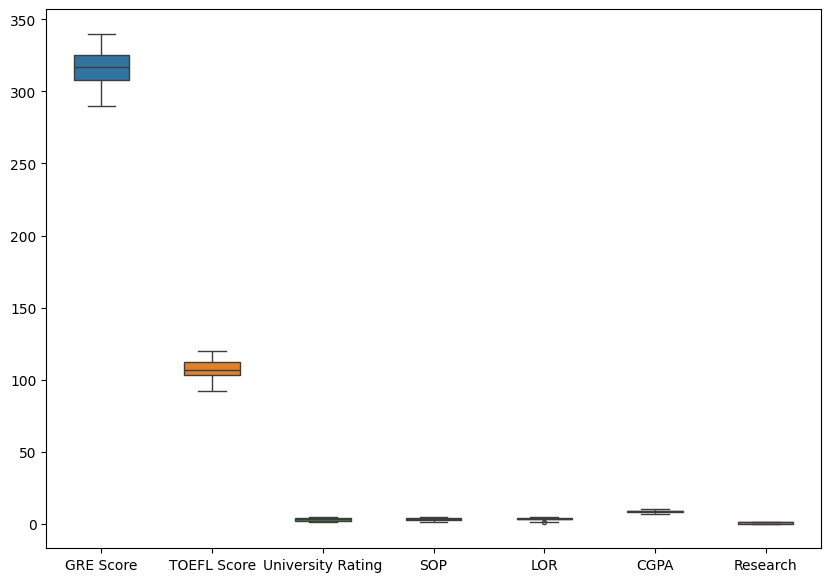

In [74]:
fig, ax= plt.subplots(figsize=(10,7))
sns.boxplot(data= df, width= 0.5, ax=ax, fliersize= 3)

In [75]:
# Divide dataset into independent and dependent features
X= df.drop(columns= ['Chance of Admit'])
y= df['Chance of Admit']

In [76]:
!pip install imblearn

In [77]:
from imblearn.over_sampling import SMOTE
oversample= SMOTE()
X,y= oversample.fit_resample(X,y)

In [78]:
# #seperate dataset into train and test
# X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.20, random_state= 0)
# X_train.shape, X_test.shape

In [79]:
n_splits = 5

stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
for fold, (train_index, test_index) in enumerate(stratified_kfold.split(X, y)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [80]:
y_test.value_counts()

0    93
1    92
Name: Chance of Admit, dtype: int64

In [81]:
import pickle
# Now Standardization of data

def scaler_standard(X_train, X_test):
  # scaling the data
  scaler= StandardScaler()
  X_train_scaled= scaler.fit_transform(X_train)
  X_test_scaled= scaler.transform(X_test)

  # saving the model
  file= open('standardScaler.pkl', 'wb')
  pickle.dump(scaler,file)
  file.close()

  return X_train_scaled, X_test_scaled

In [82]:
X_train_scaled, X_test_scaled= scaler_standard(X_train, X_test)

In [83]:
log_reg= LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [84]:
# Hyperparameter Tuning
# Grid Search CV
from sklearn.model_selection import GridSearchCV
parameters={
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': np.logspace(-3, 3, 7),
    'solver': ['lbfgs', 'liblinear', 'newton-cg']
}

In [85]:
logreg= LogisticRegression()
clf= GridSearchCV(logreg, param_grid= parameters, scoring= 'accuracy', cv= 10)
clf.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg']},
             scoring='accuracy')

In [86]:
clf.best_params_

{'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}

In [87]:
clf.best_score_

0.8988288288288289

Now See the prediction

In [88]:
y_pred= clf.predict(X_test_scaled)

In [89]:
y_pred

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1])

Now time comes to accuracy

In [90]:
conf_mat= confusion_matrix(y_test, y_pred)
conf_mat

array([[85,  8],
       [13, 79]])

In [91]:
true_positive= conf_mat[0][0]
false_positive= conf_mat[0][1]
false_negative= conf_mat[1][0]
true_negative= conf_mat[1][1]

In [92]:
Accuracy= (true_positive + true_negative)/ (true_positive + true_negative + false_positive + false_negative)
Accuracy

0.8864864864864865

In [93]:
Precision= true_positive/(true_positive + false_positive)
Precision

0.9139784946236559

In [94]:
Recall= true_positive/(true_positive + false_negative)
Recall

0.8673469387755102

In [95]:
F1_Score= 2*(Recall* Precision)/(Recall + Precision)
F1_Score

0.8900523560209423

Accuracy -> 91%  
Precision -> 89.4%  
Recall -> 94.4%  
F1 _Score -> 0.918

## After SMOTE
Accuracy -> 89.18%  
Precision -> 93.54%  
Recall -> 86.13%  
F1 _Score -> 0.896  

In [96]:
import pickle
file= open('modelForPrediction.pkl', 'wb')
pickle.dump(log_reg,file)
file.close()